# Uploading file to Colab

In [ ]:
from google.colab import files
uploaded = files.upload()  

Saving Fraud.csv to Fraud.csv


# importing the dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

# importing the CSV file

In [6]:
data = pd.read_csv('Fraud.csv')

## checking shape of Data

In [7]:
data.shape

(6362620, 11)

In [8]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# Checking for the null values in the data

In [10]:
data.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


## checking the data distribution weather it is a balanced or unbalanced data

In [11]:
data.isFraud.value_counts()

,count
isFraud,
0,6354407
1,8213


### Highly unbalanced cause one class is present in very less amount with respect to the other one

# checking for the outliers in the data

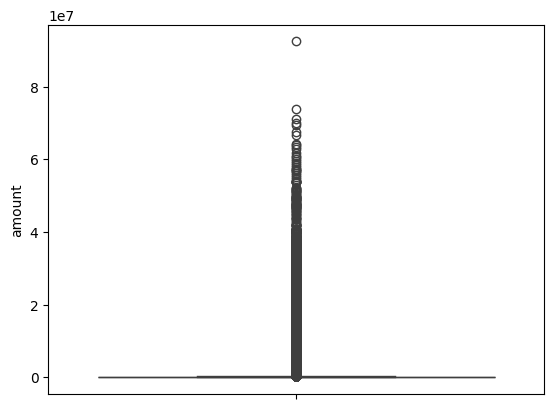

In [12]:
sns.boxplot(data=data.amount)
plt.show()

# Removing the outliers

In [13]:
Q1 = data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)

In [14]:
IQR = Q3 - Q1
data = data[(data['amount'] >= (Q1 - 1.5 * IQR)) & (data['amount'] <= (Q3 + 1.5 * IQR))]

In [15]:
data.shape

(6024542, 11)

# checking the class distribution of isFraud again

In [16]:
data.isFraud.value_counts()

,count
isFraud,
0,6020183
1,4359


## Frauds cases reduce to almost half that were earlier 8213 So, we can't removing the outliers directly cause here more fraction of the ouliers are from the Fraud category got removed which important for the training data , So we remove the outliers Based on class separately not Directly on the whole dataset

In [17]:
data = pd.read_csv('Fraud.csv')

In [18]:
def remove_outliers_iqr(data, features):
    cleaned_data = data.copy()
    for col in features:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
    return cleaned_data

# Split fraud and non-fraud data
fraud_data = data[data['isFraud'] == 1]
nonfraud_data = data[data['isFraud'] == 0]

In [19]:
print(f'Fraud data shape: {fraud_data.shape}')
print(f'Non-fraud data shape: {nonfraud_data.shape}')

Fraud data shape: (8213, 11)
Non-fraud data shape: (6354407, 11)


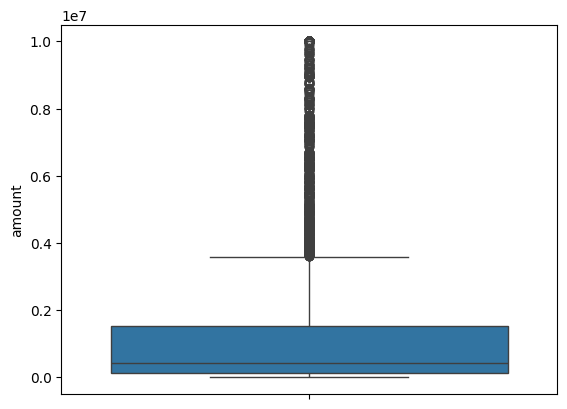

In [20]:
sns.boxplot(data=fraud_data.amount)
plt.show()

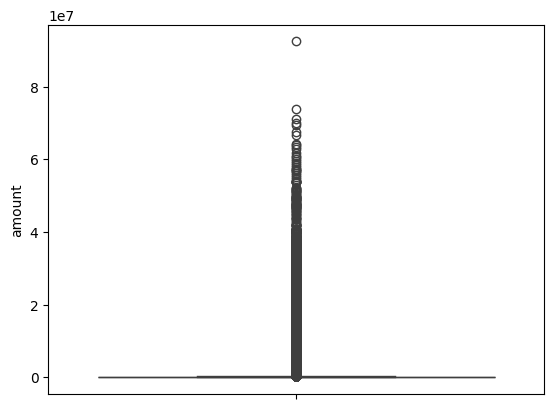

In [21]:

sns.boxplot(data=nonfraud_data.amount)
plt.show()

In [22]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [23]:
num_features = ['amount']

fraud_cleaned = remove_outliers_iqr(fraud_data, num_features)
nonfraud_cleaned = remove_outliers_iqr(nonfraud_data, num_features)

In [24]:

print(f'Fraud data shape after cleaning: {fraud_cleaned.shape}')
print(f'Non-fraud data shape after cleaning: {nonfraud_cleaned.shape}')

Fraud data shape after cleaning: (7215, 11)
Non-fraud data shape after cleaning: (6019060, 11)


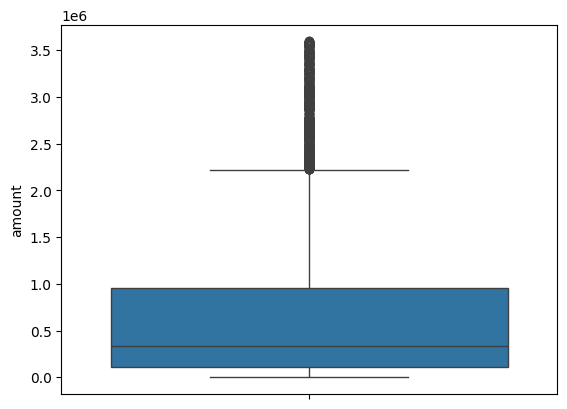

In [25]:
sns.boxplot(data=fraud_cleaned.amount)
plt.show()

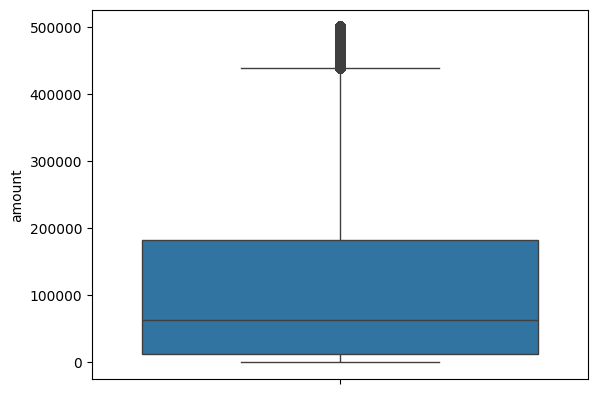

In [26]:
sns.boxplot(data=nonfraud_cleaned.amount)
plt.show()

In [27]:
data_cleaned = pd.concat([fraud_cleaned, nonfraud_cleaned], axis=0)

In [28]:
data_cleaned.shape

(6026275, 11)

In [29]:
data_cleaned.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [30]:
data_cleaned.type.value_counts()

,count
type,
CASH_OUT,2186173
PAYMENT,2151495
CASH_IN,1373574
TRANSFER,273603
DEBIT,41430


In [31]:
data_cleaned.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# Removing the name columns because of no use 'nameOrig' and 'nameDest'

In [32]:
data_cleaned.drop(['nameOrig','nameDest'], axis=1, inplace=True)


In [33]:
data_cleaned.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,0
3,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1,0


### Now encoding of the type of transation using ontHotencoding becasue type column has nominal data

In [34]:
from sklearn.preprocessing import OneHotEncoder

df = data_cleaned.copy()

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['type']])
ohe_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['type']))

In [35]:
df_encoded = pd.concat([df.drop(columns=['type']).reset_index(drop=True),
                        ohe_df.reset_index(drop=True)], axis=1)

In [36]:
df_encoded.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,181.0,181.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,1.0
1,1,181.0,181.0,0.0,21182.0,0.0,1,0,0.0,1.0,0.0,0.0,0.0
2,1,2806.0,2806.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,1.0
3,1,2806.0,2806.0,0.0,26202.0,0.0,1,0,0.0,1.0,0.0,0.0,0.0
4,1,20128.0,20128.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,1.0


In [37]:
df_encoded.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

# Input Featurs Now for the model
'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
'newbalanceDest',isFlaggedFraud', 'type_CASH_IN',
'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'

In [38]:
X = df_encoded[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest','isFlaggedFraud', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']]
y = df_encoded['isFraud']

In [39]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,181.0,181.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0
1,1,181.0,181.0,0.0,21182.0,0.0,0,0.0,1.0,0.0,0.0,0.0
2,1,2806.0,2806.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0
3,1,2806.0,2806.0,0.0,26202.0,0.0,0,0.0,1.0,0.0,0.0,0.0
4,1,20128.0,20128.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0


In [40]:
y.head()

,isFraud
0,1
1,1
2,1
3,1
4,1


In [41]:
y.value_counts()

,count
isFraud,
0,6019060
1,7215


# Target Variable is
'isFraud'

In [42]:
from sklearn.model_selection import train_test_split

# X = features, y = target column
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# Using the stratify technique both the class have equal proportion in training and testing dataset

In [43]:
y_test.value_counts()

,count
isFraud,
0,1203812
1,1443


In [44]:

y_train.value_counts()

,count
isFraud,
0,4815248
1,5772


# Model training without SMOTE

In [45]:
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# using naive bayes

In [51]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)[:, 1]

In [55]:
print("===== Naive Bayes =====")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_nb))


===== Naive Bayes =====
[[1194793    9019]
 [    830     613]]
              precision    recall  f1-score   support

           0     0.9993    0.9925    0.9959   1203812
           1     0.0636    0.4248    0.1107      1443

    accuracy                         0.9918   1205255
   macro avg     0.5315    0.7087    0.5533   1205255
weighted avg     0.9982    0.9918    0.9948   1205255

ROC-AUC: 0.8645186169504752


When applying the Naïve Bayes model to this highly imbalanced fraud detection dataset, the evaluation metrics reveal important insights. 
For the majority class (non-fraud), the model performs very well, achieving 99.93% precision, 99.25% recall, and 99.59% F1-score, which indicates that it is excellent at correctly classifying legitimate transactions. 
However, for the minority class (fraudulent transactions), the performance is quite weak, with only 6.36% precision, 42.48% recall, and an F1-score of 11.07%. 
This means that while the model manages to catch some fraud cases (recall ~42%), it also makes many false predictions, leading to very low precision. 
The confusion matrix further highlights this imbalance: out of 1,443 actual fraud cases, only 613 are correctly identified (True Positives), while 830 are missed (False Negatives). 
Similarly, among the non-fraud cases, although the majority are classified correctly, around 9,019 legitimate transactions are wrongly flagged as fraud (False Positives). 
Overall, this shows that Naïve Bayes is biased towards the majority class and struggles with identifying fraud effectively. Despite its high overall accuracy (driven by the dominance of non-fraud cases), the low recall and F1-score for fraud detection indicate that the model is not reliable for real-world fraud detection, where catching fraudulent cases is the top priority.

# Using LIGHT BGM

In [56]:
lgbm = lgb.LGBMClassifier(
    n_estimators=500,          # number of trees
    learning_rate=0.05,        # step size
    num_leaves=64,             # controls complexity
    class_weight="balanced",   # handles imbalance
    random_state=42,
    n_jobs=-1                  # use all CPU cores
)

# Train
lgbm.fit(X_train, y_train)

# Predictions
y_pred = lgbm.predict(X_test)
y_prob = lgbm.predict_proba(X_test)[:, 1]

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

[LightGBM] [Info] Number of positive: 5772, number of negative: 4815248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1540
[LightGBM] [Info] Number of data points in the train set: 4821020, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1203812
           1       0.62      0.97      0.76      1443

    accuracy                           1.00   1205255
   macro avg       0.81      0.99      0.88   1205255
weighted avg       1.00      1.00      1.00   1205255

ROC-AUC Score: 0.9998597735308284


In [57]:
print(confusion_matrix(y_test, y_pred))

[[1202941     871]
 [     37    1406]]


The LightGBM model demonstrated exceptional performance in fraud detection. 
For the non-fraud class (majority), the model achieved near-perfect precision, recall, and F1-score, all close to 1.00, confirming its reliability in identifying legitimate transactions. 
More importantly, for the fraud class (minority), the model delivered a precision of 0.62, recall of 0.97, and an F1-score of 0.76. This shows that LightGBM not only correctly identified almost all fraud cases (very high recall, 97%) but also maintained a reasonable balance between false positives and true fraud detections. 
The confusion matrix supports this, where out of 1443 actual fraud transactions, the model correctly detected 1406 and missed only 37, while incorrectly flagging 871 legitimate transactions as fraud. 
Furthermore, the ROC-AUC score of 0.9998 indicates excellent discriminative power between fraud and non-fraud cases. 
Overall, LightGBM provides highly accurate and robust fraud detection, making it significantly more effective than traditional models in handling severe class imbalance.

# With SMOTE

# naive byes

In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

nb = GaussianNB()
nb.fit(X_train_res, y_train_res)

y_pred_nb = nb.predict(X_test)
print("\nNaïve Bayes with SMOTE Results:")
print(classification_report(y_test, y_pred_nb, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Before SMOTE: isFraud
0    4815248
1       5772
Name: count, dtype: int64
After SMOTE: isFraud
0    4815248
1    4815248
Name: count, dtype: int64

Naïve Bayes with SMOTE Results:
              precision    recall  f1-score   support

           0     1.0000    0.2172    0.3569   1203812
           1     0.0015    0.9979    0.0030      1443

    accuracy                         0.2182   1205255
   macro avg     0.5008    0.6076    0.1800   1205255
weighted avg     0.9988    0.2182    0.3565   1205255

Confusion Matrix:
 [[261500 942312]
 [     3   1440]]


Before applying SMOTE, the dataset was highly imbalanced with 4,815,248 non-fraud transactions and only 5,772 fraud transactions. 
After applying SMOTE, the dataset was balanced, resulting in 4,815,248 transactions each for both fraud and non-fraud classes. 
When Naïve Bayes was trained on this balanced dataset, it achieved a recall of 99.79% for fraud transactions, meaning it was able to correctly identify almost all fraudulent cases. However, the model suffered from a significant drop in precision (0.15%) for fraud, as it misclassified a very large number of non-fraud transactions as fraud. This is evident from the confusion matrix, where 942,312 non-fraud cases were wrongly classified as fraud. 
Consequently, while the model is very sensitive to detecting fraud (high recall), it is unreliable for practical use due to excessive false positives, which would overwhelm any fraud detection system with too many false alarms.

# light bgm

In [58]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

lgbm = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    class_weight='balanced',
    random_state=42
)

lgbm.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = lgbm.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Before SMOTE: isFraud
0    4815248
1       5772
Name: count, dtype: int64
After SMOTE: isFraud
0    4815248
1    4815248
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 4815248, number of negative: 4815248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.514575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 9630496, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1203812
           1       0.34      0.99      0.50      1443

    accuracy                           1.00   1205255
   macro avg       0.67      1.00      0.75   1205255
weighted avg       1.00      1.00      1.00   12

After applying SMOTE oversampling, the class imbalance in the dataset was eliminated, resulting in an equal number of fraud and non-fraud samples during training. 
LightGBM demonstrated significant improvement in detecting fraudulent cases compared to the non-SMOTE version. 
The recall for fraud transactions (class 1) increased dramatically to 0.99, meaning the model was able to identify nearly all fraudulent cases. 
However, this improvement came with a trade-off: precision for fraud dropped to 0.34, indicating that many of the transactions predicted as fraud were actually legitimate. The F1-score for fraud settled at 0.50, reflecting this balance between high recall and lower precision. 
The confusion matrix further shows that only 9 fraud cases were missed, but around 2815 legitimate transactions were falsely flagged as fraud. 
Overall, this version of LightGBM is highly effective for catching fraudulent cases (high recall), which is often the most critical objective in fraud detection, but it comes at the expense of more false positives that would need to be reviewed by a secondary process.

Why LightGBM performed best here:

Handles class imbalance well (even after SMOTE, its boosting nature reduces noise).

Captures non-linear relationships between features.

Better at distinguishing fraud vs. non-fraud compared to Naïve Bayes, which assumes independence and struggles with overlapping distributions.


Naïve Bayes → High recall but terrible precision (flags too many false frauds).

LightGBM → Balanced precision & recall, best choice with SMOTE for your dataset.